In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd

In [2]:
np.random.seed(42)
X = np.random.uniform(-3, 3, (500, 2))  # 500 points, 2 features
y = (X[:, 1] > X[:, 0]**2).astype(int)  # Quadratic decision boundary


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


In [4]:
model = SVC(kernel='rbf', random_state=0)
model.fit(x_train, y_train)


SVC(random_state=0)

In [5]:
y_pred = model.predict(x_test)


In [6]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Accuracy in Percentage:", int(accuracy_score(y_test, y_pred) * 100), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[122   0]
 [  1  27]]
Accuracy Score: 0.9933333333333333
Accuracy in Percentage: 99 %

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



[Text(0.5, 1.0, 'SVM with Quadratic Data')]

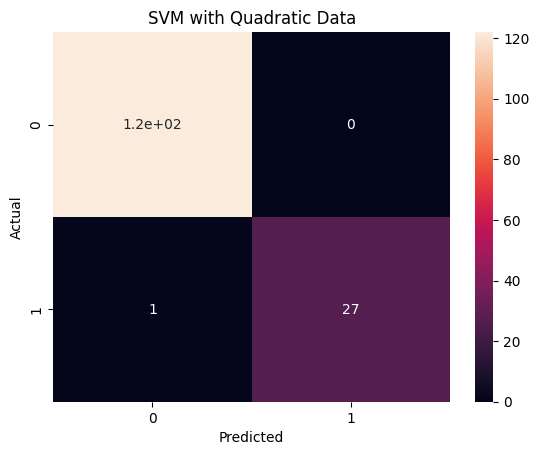

In [7]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title="SVM with Quadratic Data")


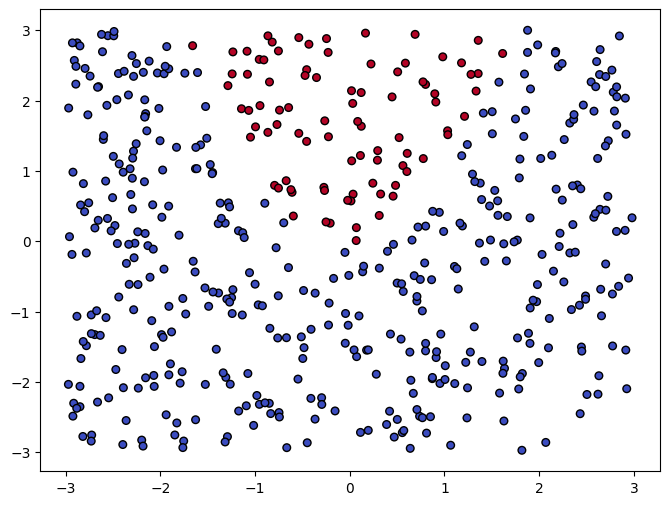

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')


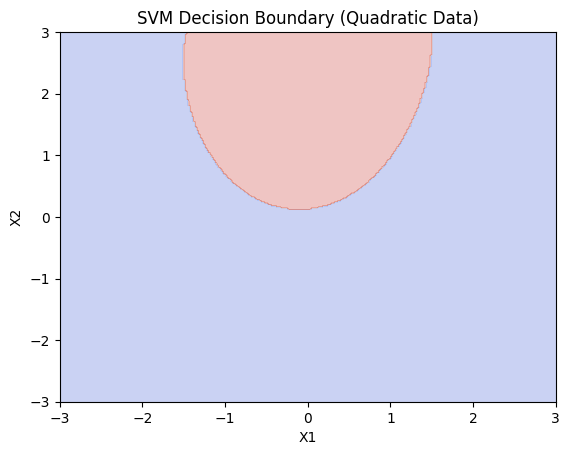

In [9]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 300), np.linspace(-3, 3, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("SVM Decision Boundary (Quadratic Data)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
